# Particle Swarm Optimization (PSO):

The process of finding optimal values for the specific parameters of a given system to fulfill all design requirements while considering the lowest possible cost is referred to as an optimization. Optimization problems can be found in all fields of science.

Conventional optimization algorithms (Deterministic algorithms) have some limitations such as:

single-based solutions
converging to local optima
unknown search space issues

## Pseudocode

1. Define the Problem:
    - Define a fitness function to optimize (e.g., f(x) = x^2)

2. Initialize Parameters:
    - Set the number of particles (e.g., 30)
    - Set the maximum number of iterations (e.g., 100)
    - Set the inertia weight (e.g., 0.7)
    - Set the cognitive coefficient (e.g., 1.5)
    - Set the social coefficient (e.g., 1.5)
    - Define the boundaries for particle positions (e.g., min_value = -10, max_value = 10)

3. Initialize Particles:
    - Randomly initialize particle positions and velocities within the defined boundaries
    - Initialize the best position of each particle as its current position
    - Set the global best position as the best position of the particle with the highest fitness

4. Evaluate Fitness:
    - For each particle, calculate its fitness using the defined fitness function

5. Update Velocities and Positions:
    - For each particle, update its velocity based on its own best position and the global best position using the formula:
      - Velocity = Inertia weight * Current Velocity + Cognitive Coefficient * Random Factor * (Personal Best - Current Position) + Social Coefficient * Random Factor * (Global Best - Current Position)
    - Update the position of the particle by adding the velocity to the current position

6. Iterate:
    - Repeat steps 4 and 5 for a fixed number of iterations or until convergence:
        - Evaluate fitness of all particles
        - Update personal best positions and global best position
        - Update velocities and positions of particles

7. Output the Best Solution:
    - Return the global best position and its corresponding fitness value


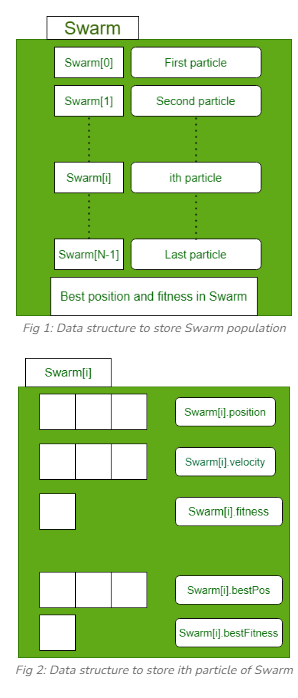

In [3]:
import random

# 1. Define the Problem: The function to optimize (maximize f(x) = -x^2 for minimization)
def fitness_function(x):
    return x ** 2  # Minimize x^2

# 2. Initialize Parameters
num_particles = 30         # Number of particles
num_iterations = 100       # Number of iterations
inertia_weight = 0.7       # Inertia weight
cognitive_coeff = 1.5      # Cognitive coefficient (personal influence)
social_coeff = 1.5         # Social coefficient (global influence)
min_value = -10            # Minimum value of x
max_value = 10             # Maximum value of x

# 3. Initialize Particles
class Particle:
    def __init__(self):
        self.position = random.uniform(min_value, max_value)   # Random position
        self.velocity = random.uniform(-1, 1)                   # Random velocity
        self.best_position = self.position                      # Best position so far
        self.best_fitness = fitness_function(self.position)    # Best fitness so far

# 4. Update Velocities and Positions
def update_velocity(particle, global_best_position):
    r1 = random.random()
    r2 = random.random()
    # Update velocity using the PSO formula
    new_velocity = (inertia_weight * particle.velocity +
                    cognitive_coeff * r1 * (particle.best_position - particle.position) +
                    social_coeff * r2 * (global_best_position - particle.position))
    return new_velocity

def update_position(particle):
    particle.position += particle.velocity
    # Ensure the particle stays within the boundaries
    particle.position = max(min(particle.position, max_value), min_value)

# 5. PSO Main Algorithm
def pso():
    # Initialize particles
    particles = [Particle() for _ in range(num_particles)]
    global_best_position = particles[0].position
    global_best_fitness = fitness_function(global_best_position)

    for iteration in range(num_iterations):
        for particle in particles:
            # Evaluate the fitness of the current position
            fitness = fitness_function(particle.position)

            # Update personal best position if the current position is better
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update global best position if the current personal best is better
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particle.position

        # Update velocity and position for each particle
        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position)
            update_position(particle)

    return global_best_position, global_best_fitness

# 6. Output the Best Solution
best_position, best_fitness = pso()
print("C NEHA-IBM22CS074")
print(f"Best position: x = {best_position}")
print(f"Best fitness: f(x) = {best_fitness}")


C NEHA-IBM22CS074
Best position: x = -6.845442586975796e-08
Best fitness: f(x) = 4.6860084211581875e-15


In [2]:
import random
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Define the Problem: Iris dataset classification
def fitness_function(params):
    learning_rate, hidden_layer_size = params
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train a neural network classifier with given parameters
    clf = MLPClassifier(solver='adam', max_iter=200, learning_rate_init=learning_rate, hidden_layer_sizes=(int(hidden_layer_size),))
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Return negative accuracy because we are minimizing the fitness function (minimizing negative accuracy)
    return -accuracy

# 2. Initialize Parameters
num_particles = 20  # Number of particles
num_iterations = 50  # Number of iterations
inertia_weight = 0.7  # Inertia weight
cognitive_coeff = 1.5  # Cognitive coefficient
social_coeff = 1.5  # Social coefficient

# Search space for hyperparameters
learning_rate_min = 0.0001
learning_rate_max = 0.1
hidden_layer_size_min = 5
hidden_layer_size_max = 50

# 3. Initialize Particles
class Particle:
    def __init__(self):
        # Randomly initialize the particle's position (hyperparameters)
        self.position = [random.uniform(learning_rate_min, learning_rate_max), random.uniform(hidden_layer_size_min, hidden_layer_size_max)]
        self.velocity = [random.uniform(-1, 1), random.uniform(-1, 1)]
        self.best_position = self.position
        self.best_fitness = fitness_function(self.position)

# 4. Update Velocities and Positions
def update_velocity(particle, global_best_position):
    r1 = random.random()
    r2 = random.random()

    # Update velocity using the PSO formula
    new_velocity = [
        inertia_weight * particle.velocity[0] + cognitive_coeff * r1 * (particle.best_position[0] - particle.position[0]) + social_coeff * r2 * (global_best_position[0] - particle.position[0]),
        inertia_weight * particle.velocity[1] + cognitive_coeff * r1 * (particle.best_position[1] - particle.position[1]) + social_coeff * r2 * (global_best_position[1] - particle.position[1])
    ]
    return new_velocity

def update_position(particle):
    # Update position
    particle.position[0] += particle.velocity[0]
    particle.position[1] += particle.velocity[1]

    # Ensure the particle's position stays within bounds
    particle.position[0] = max(min(particle.position[0], learning_rate_max), learning_rate_min)
    particle.position[1] = max(min(particle.position[1], hidden_layer_size_max), hidden_layer_size_min)

# 5. PSO Main Algorithm
def pso():
    # Initialize particles
    particles = [Particle() for _ in range(num_particles)]
    global_best_position = particles[0].position
    global_best_fitness = particles[0].best_fitness

    for iteration in range(num_iterations):
        for particle in particles:
            # Evaluate fitness of each particle
            fitness = fitness_function(particle.position)

            # Update the personal best position if necessary
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update the global best position if necessary
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particle.position

        # Update velocity and position of each particle
        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position)
            update_position(particle)

    return global_best_position, -global_best_fitness

# 6. Output the Best Solution
best_position, best_fitness = pso()
print(f"Best learning rate: {best_position[0]}")
print(f"Best hidden layer size: {int(best_position[1])}")
print(f"Best accuracy: {best_fitness}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best learning rate: 0.1
Best hidden layer size: 16
Best accuracy: 1.0
